### Travail fait par EL JANOUSSI Aya, EL KHOURI Tonia et SGHYAR Fatima Az-Zahrae

# 1. The datasets: MNIST

## 1.1. Description

The MNIST database (Modified National Institute of Standards and Technology database) is a very popular Machine Learning dataset comosed of large collection of handwritten digits. It has 70 000 black-and-white 28x28 pixels images with a handwritten digit (‘0’ to ‘9’). The goal is to classify the black-and-white 28x28 pixels images among these 10 classes. 

## 1.2. Load the dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.load('MNIST_X_28x28.npy')
y = np.load('MNIST_y.npy')


## 1.4. Works / Questions

### Q1/ What are the shape of the data? Display samples from the dataset 

In [2]:
np.shape(X)

(70000, 28, 28)

In [3]:
np.shape(y)

(70000,)

In [4]:
np.size(y)

70000

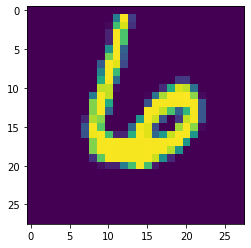

In [5]:
plt.imshow(X[210])

In [6]:
print(y)

[0 4 1 ... 7 1 1]


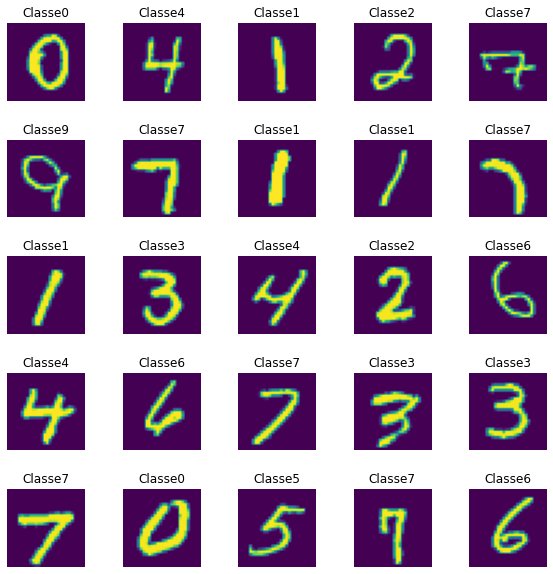

In [7]:
fig, axes = plt.subplots(5,5, figsize=(10,10))
axes = axes.ravel()
for i in np.arange(0,25):
    axes[i].imshow(X[i])
    axes[i].axis('off')
    axes[i].set_title('Classe' + str(y[i]))
    
plt.subplots_adjust(hspace=0.5)

### Q2/ Use the sklearn method train_test_split to split the dataset in one train set and one test set. Why this split is important in Machine Learning?

In [8]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y,  test_size = 0.2)

In [9]:
np.shape(X_train)

(56000, 28, 28)

In [10]:
np.shape(y_train)

(56000,)

In [11]:
np.shape(X_test)

(14000, 28, 28)

In [12]:
np.shape(y_test)

(14000,)

We split the data to evaluate the performance of our Machine Learning model and to identify overfitting.

We notice that our training data represents 80% of the MNIST Dataset whilst our test data represents 20% as we set test_size to 0.2 (20%).

.

### Q3/ Are the train and test sets well balanced (distribution of labels)? Why is it important for supervised Machine Learning?

In [13]:
from collections import Counter
class_frequencies = Counter (y_train)
print (class_frequencies)

Counter({1: 6287, 7: 5813, 3: 5722, 2: 5622, 0: 5586, 9: 5547, 6: 5499, 4: 5447, 8: 5418, 5: 5059})


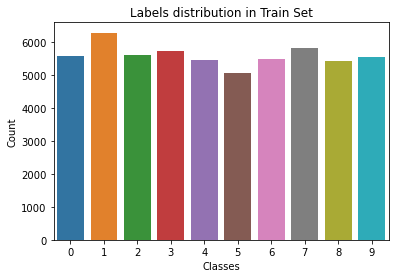

In [14]:
import seaborn as sns
fig = sns.countplot(x=y_train)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Labels distribution in Train Set") 
plt.show(fig)

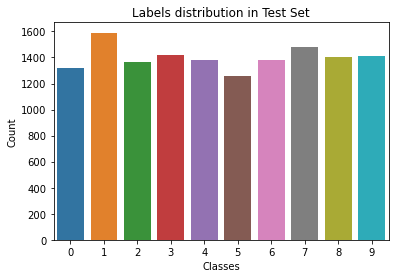

In [15]:
fig = sns.countplot(x=y_test)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Labels distribution in Test Set") 
plt.show(fig)

We notice that our train and test sets are well balanced indeed. On average we got approximately 5000 pictures of each class for the train set. And approximately 1350 pictures for each class for the test set.

It is important to have well balanced train and test sets to get more accurate results and prevent biases!

---------------------------------------------------------------------

# 2. Unsupervised Machine Learning

## 2.1. Dimensionality reduction

### Works / Questions

### Q1/ Perform a Principal Component Analysis (PCA) with sklearn.Try to keep different n_components 

In [16]:
from sklearn.decomposition import PCA

In [17]:
nsamples, nx, ny = X_train.shape
d2_X_train = X_train.reshape((nsamples,nx*ny))

In [18]:
d2_X_train.shape

(56000, 784)

#### n_components = 784

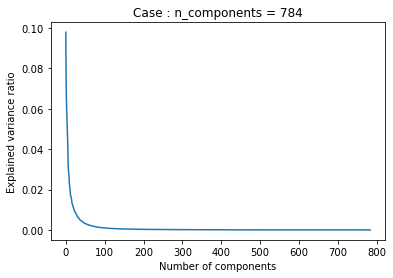

In [19]:
pca = PCA(n_components=784)
pca.fit(d2_X_train)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Case : n_components = 784')
plt.show()

#### n_components = 80

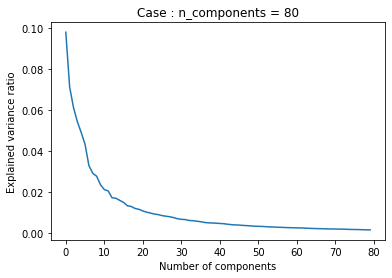

In [20]:
pca = PCA(n_components=80)
pca.fit(d2_X_train)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Case : n_components = 80')
plt.show()

#### n_components = 220

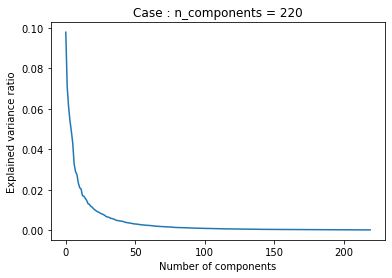

In [21]:
pca = PCA(n_components=220)
pca.fit(d2_X_train)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Case : n_components = 220')
plt.show()

### Q2/ An interesting feature is PCA.explained_variance_ratio_. Explain these values according to your understanding of PCA and use these values to fit a relevant value for n_components

In [22]:
pca = PCA(n_components=784)
pca.fit(d2_X_train)
print(pca.explained_variance_ratio_)

[9.78607007e-02 7.11299751e-02 6.11378609e-02 5.41981991e-02
 4.89496870e-02 4.31231201e-02 3.27951510e-02 2.90182057e-02
 2.76258219e-02 2.34585115e-02 2.10717984e-02 2.04504830e-02
 1.71078101e-02 1.68594016e-02 1.58299768e-02 1.48260997e-02
 1.31903165e-02 1.28183569e-02 1.18559912e-02 1.14479059e-02
 1.06499355e-02 1.00639049e-02 9.62296362e-03 9.13030891e-03
 8.86813806e-03 8.39141963e-03 8.09569577e-03 7.82375632e-03
 7.41106888e-03 6.87086798e-03 6.57261235e-03 6.46733510e-03
 6.03135688e-03 5.89644695e-03 5.65226372e-03 5.43846166e-03
 5.03783987e-03 4.88290486e-03 4.78461280e-03 4.69136079e-03
 4.55001987e-03 4.43985121e-03 4.17212448e-03 3.97089406e-03
 3.83828877e-03 3.75857479e-03 3.60180744e-03 3.49855619e-03
 3.38283193e-03 3.19590800e-03 3.15901657e-03 3.10544990e-03
 2.97461599e-03 2.88044549e-03 2.82623573e-03 2.69479392e-03
 2.67369393e-03 2.56823549e-03 2.52467808e-03 2.45358712e-03
 2.38932937e-03 2.38023518e-03 2.28727408e-03 2.20929933e-03
 2.12083662e-03 2.064836

In [23]:
print(pca.singular_values_)

[1.37074397e+05 1.16863398e+05 1.08344608e+05 1.02010438e+05
 9.69453856e+04 9.09928507e+04 7.93518398e+04 7.46427206e+04
 7.28299123e+04 6.71123441e+04 6.36067176e+04 6.26619589e+04
 5.73125052e+04 5.68948899e+04 5.51305496e+04 5.33538350e+04
 5.03245373e+04 4.96099013e+04 4.77112853e+04 4.68829799e+04
 4.52194912e+04 4.39577490e+04 4.29839779e+04 4.18692247e+04
 4.12637226e+04 4.01393100e+04 3.94256872e+04 3.87578645e+04
 3.77218173e+04 3.63210157e+04 3.55239453e+04 3.52382932e+04
 3.40298235e+04 3.36470800e+04 3.29430186e+04 3.23139626e+04
 3.11010007e+04 3.06190219e+04 3.03092773e+04 3.00124604e+04
 2.95568964e+04 2.91968764e+04 2.83028918e+04 2.76119026e+04
 2.71469476e+04 2.68635733e+04 2.62973768e+04 2.59177090e+04
 2.54854551e+04 2.47713296e+04 2.46279427e+04 2.44182450e+04
 2.38983346e+04 2.35170051e+04 2.32946599e+04 2.27465199e+04
 2.26572934e+04 2.22059626e+04 2.20168502e+04 2.17046569e+04
 2.14185563e+04 2.13777561e+04 2.09561398e+04 2.05958378e+04
 2.01792857e+04 1.991108

PCA.explained_variance_ratio_ is used to get the ration of variance (eigenvalue / total eigenvalues). If we sum up the array's values it will be equal to 1 which means that if we gather all the principal components it will indeed explain the total of the variance of the data. Let's try to verify that using the following line of code :

In [24]:
print(np.sum(pca.explained_variance_ratio_))

0.9999999999999998


In [25]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1
print(n_components)

154


This means that having 154 components will enable us to explain 95% of the variance of the data.
Furthermore, We can also find it approximately by plotting the graph, using the following code : 

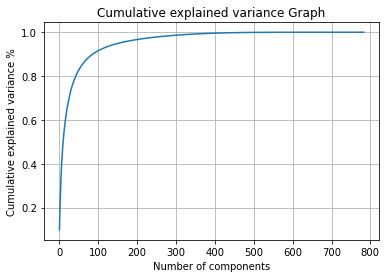

In [26]:
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance %')
plt.title('Cumulative explained variance Graph')
plt.grid()
plt.show()

Indeed, we notice that having 154 components give us a cumulative explained variance of 95%

### Q3/ Display some MNIST pictures with different values of n_components. 

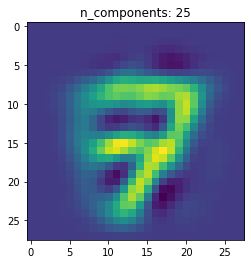

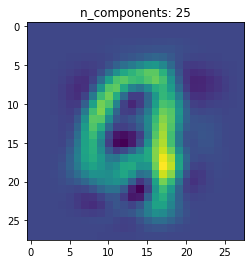

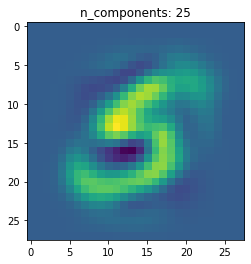

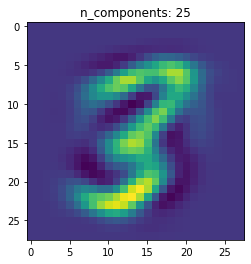

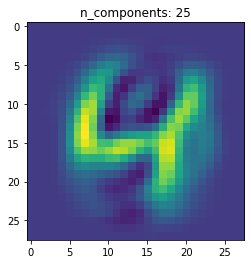

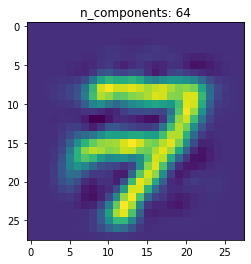

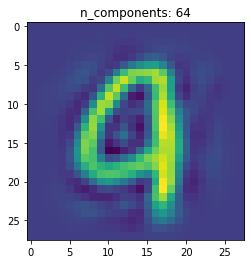

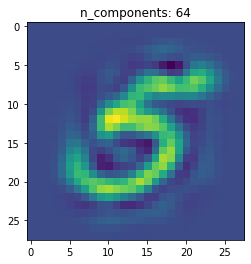

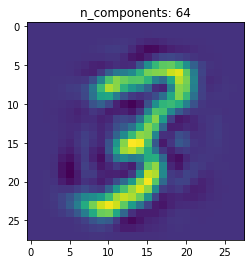

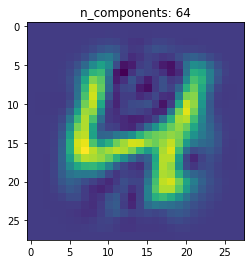

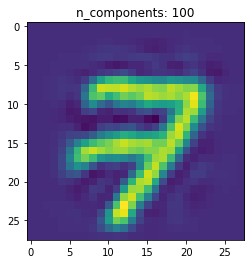

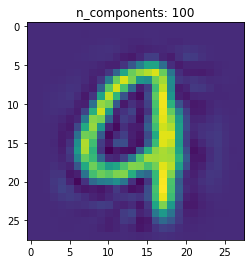

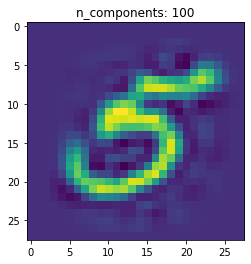

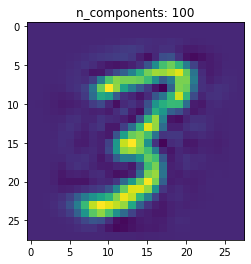

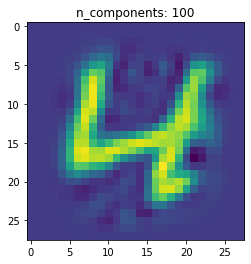

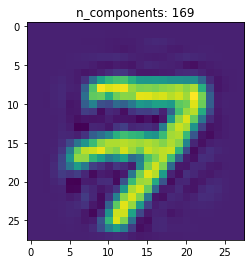

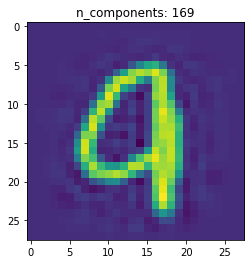

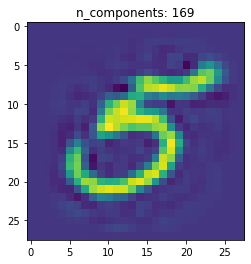

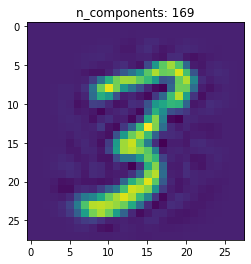

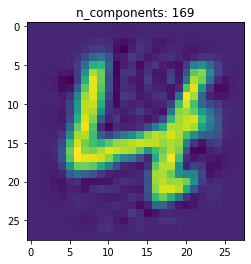

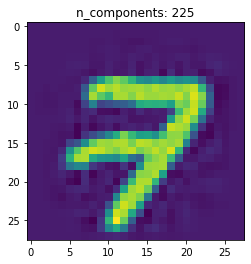

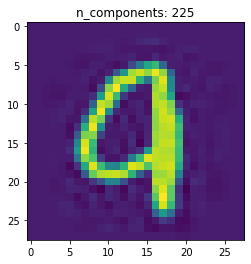

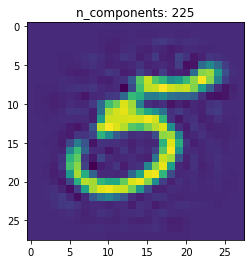

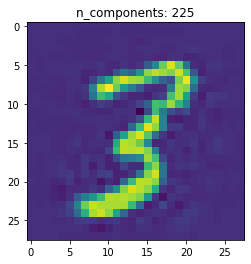

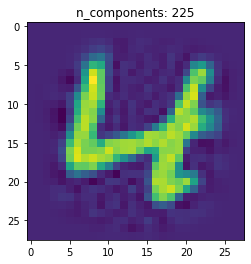

In [27]:
# Initialize the PCA model
n_components = [25, 64, 100, 169, 225]

for n in n_components:
    pca = PCA(n_components=n)

    reduced_d2_X = pca.fit_transform(d2_X_train)

    X_pca = pca.inverse_transform(reduced_d2_X)
    X_pca_d2_approx = X_pca.reshape(nsamples, nx, ny)

    # Plot some MNIST pictures with different values of n_components
    for i in range(5):
        plt.figure(figsize=(4,4))
        plt.imshow(X_pca_d2_approx[i])
        plt.title("n_components: {}".format(n))
        plt.show()

# 2.2. Data clustering

## Questions / Works

### Q1/ You already split X (and y) in a train and test sets with the sklearn method: split_train_test. With sklearn, perform K-MEANS. Play with the parameter K as well as the initialization (KMEANS++, random, or fixed array)

In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=1).fit(d2_X_train)

In [30]:
kmeans.labels_

array([1, 0, 1, ..., 1, 0, 1])

In [31]:
kmeans.predict(d2_X_train)

array([1, 0, 1, ..., 1, 0, 1])

In [32]:
kmeans.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
d2_X_train.shape

(56000, 784)

#### k-means++ initialization

In [34]:
kmeans = KMeans(n_clusters=5, init='k-means++').fit(d2_X_train)

In [35]:
kmeans.predict(d2_X_train)

array([2, 2, 3, ..., 3, 0, 0])

In [36]:
kmeans.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Random initialization

In [37]:
kmeans = KMeans(n_clusters=10, init='random').fit(d2_X_train)

In [38]:
kmeans.predict(d2_X_train)

array([4, 3, 7, ..., 9, 1, 1])

In [39]:
kmeans.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

When using the kmeans ++ initialization, we find the most distant initial centroids, whereas with a random initialization those centroids are chosen randomly. On the other hand, the fixed array initialization chose the initial centroids from the fixed array provided in init but it's annoying to do this type of initialization since we will need to create an array of shape (3,784), "3" being the number of clusters and "784" the number of features of the data.

### Q2/ For the correct K (K=10), evaluate how good is this partition (with the knowledge of y)

In [40]:
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import adjusted_rand_score
res_model = []
res_param = []
res_train_acc = []
res_valid_acc = []
res_test_acc = []

In [41]:
nsamples, nx, ny = X_test.shape
d2_X_test = X_test.reshape((nsamples,nx*ny))

ncluster = 10

kmeans = KMeans(n_clusters=ncluster, init='k-means++').fit(d2_X_train)
y_pred = kmeans.predict(d2_X_test)
print("Evaluation of the clustering (K-Means, all information):")
print("Homoegneity within clusters:", homogeneity_score(y_test, y_pred) )
print("Completeness score:", completeness_score(y_test, y_pred) )
print("Adjusted Rand Score:", adjusted_rand_score(y_test, y_pred) )
print("V-measure: ", v_measure_score(y_test, y_pred) )

res_model.append("K-means")
res_param.append("10 clusters \nAll data")
res_train_acc.append("-")
res_valid_acc.append("-")
res_test_acc.append(v_measure_score(y_test, y_pred))


Evaluation of the clustering (K-Means, all information):
Homoegneity within clusters: 0.49695622802035133
Completeness score: 0.5053233300704322
Adjusted Rand Score: 0.3618521352209539
V-measure:  0.5011048544596556


------------------------------

- homogeneity_score: gives the degree to which all of the clusters contain only data points which are members of a single class.
- completeness_score: gives the degree to which all the data points that are members of a given class are assigned to the same cluster.
- adjusted_rand_score: gives a normalized measure of similarity between two label assignments.
- v_measure_score: gives a combination of homogeneity and completeness score.

We notice that the results are not good thus it's not reliable.

### Q3/ Using the PCA performed in section 2 apply K-MEANS with K=10 and n_components = 2. Display the partition and comment.

Evaluation of the clustering (K-Means, 2 principal components):
Homoegneity within clusters: 0.3550043587286218
Completeness score: 0.35963802661256083
V-measure:  0.3573061705570845


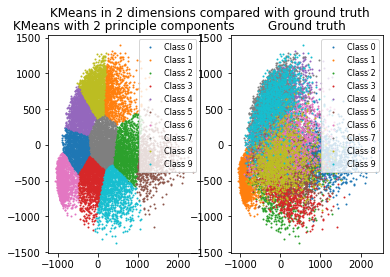

In [42]:
pca = PCA(n_components=2)
reduced_d2_X_train = pca.fit_transform(d2_X_train)
reduced_d2_X_test = pca.transform(d2_X_test)
kmeans = KMeans(n_clusters=10, init='k-means++').fit(reduced_d2_X_train)
y_pred = kmeans.predict(reduced_d2_X_test)
print("Evaluation of the clustering (K-Means, 2 principal components):")
print("Homoegneity within clusters:", homogeneity_score(y_test, y_pred) )
print("Completeness score:", completeness_score(y_test, y_pred) )
print("V-measure: ", v_measure_score(y_test, y_pred) )

plt.suptitle('KMeans in 2 dimensions compared with ground truth')
plt.subplot(1,2,1)
plt.title('KMeans with 2 principle components')
for i in range(0,10):
    lbl = 'Class ' + str(i)
    plt.scatter(reduced_d2_X_test[(y_pred==i),0], reduced_d2_X_test[(y_pred==i),1], s=1, label=lbl)
plt.legend(prop={'size': 8})
plt.subplot(1,2,2)
plt.title('Ground truth')
for i in range(0,10):
    lbl = 'Class ' + str(i)
    plt.scatter(reduced_d2_X_test[(y_test==i),0], reduced_d2_X_test[(y_test==i),1], s=1, label=lbl)
plt.legend(prop={'size': 8})
plt.show()

res_model.append("K-means")
res_param.append("10 clusters \n2 principle components")
res_train_acc.append("-")
res_valid_acc.append("-")
res_test_acc.append(v_measure_score(y_test, y_pred))

The homogeneity score and the completeness score indicates that the k-means model is not doing performing well to separate the samples into the correct clusters. The v-measure score is also relatively low. This suggests that this k-means model is not a good fit for this dataset. We will need to consider using another clustering algorithm or just change the parameters of the model.

### Q4/ Do the same job with the EM-clustering using the good K parameter (10 for MNIST). Comment your results.


Evaluation of the clustering (EMGM, 2 principal components):
Homoegneity within clusters: 0.36034412909630886
Completeness score: 0.3695990552084314
V-measure:  0.3649129206973976


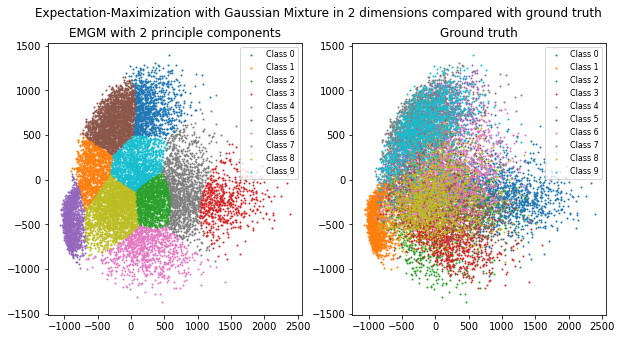

In [43]:
from sklearn import mixture
emgm = mixture.GaussianMixture(n_components=10,covariance_type='full').fit(reduced_d2_X_train)
y_pred = emgm.predict(reduced_d2_X_test)
print("Evaluation of the clustering (EMGM, 2 principal components):")
print("Homoegneity within clusters:", homogeneity_score(y_test, y_pred) )
print("Completeness score:", completeness_score(y_test, y_pred) )
print("V-measure: ", v_measure_score(y_test, y_pred) )

plt.figure(figsize=(10,5))
plt.suptitle('Expectation-Maximization with Gaussian Mixture in 2 dimensions compared with ground truth')
plt.subplot(1,2,1)
plt.title('EMGM with 2 principle components')
for i in range(0,10):
    lbl = 'Class ' + str(i)
    plt.scatter(reduced_d2_X_test[(y_pred==i),0], reduced_d2_X_test[(y_pred==i),1], s=1, label=lbl)
plt.legend(prop={'size': 8})
plt.subplot(1,2,2)
plt.title('Ground truth')
for i in range(0,10):
    lbl = 'Class ' + str(i)
    plt.scatter(reduced_d2_X_test[(y_test==i),0], reduced_d2_X_test[(y_test==i),1], s=1, label=lbl)
plt.legend(prop={'size': 8})
plt.show()

res_model.append("EM Gaussian Mix")
res_param.append("10 clusters \n2 principle components")
res_train_acc.append("-")
res_valid_acc.append("-")
res_test_acc.append(v_measure_score(y_test, y_pred))

In this case, this second k-means model is a little better than the previous one. However, we feel like the model is still not able to consider the complexity of the data and it still confuses some classes especially that we only considered two principal components.

# 3. Supervised Machine Learning


## 3.1. Decision Tree, SVM and Logistic Regression

## Questions / Works

### Q1/ What is the major difference between Naïve Bayes Classifier and Support Vector Machine (or Logistic Regression)? (if you forgot the course #2, a clue: what are we trying to predict?)

Naive Bayes classifier is a generative model that evaluates P(X|y) to know P(y|X) whereas SVM and 
logistic regression are discriminative models that estimate P(y|X).

### Q2/ With sklearn, perform a classification using your favorite methods. With the documentation, check how to modify the parameters and comment how it influences the results. For example, if you chose SVM, change the kernel between ‘linear’ and ‘rbf’(Gaussian kernel). You can also play with ‘C’ parameter to switch from hardmargin SVM to soft-margin SVM2… 

-----------------------------------------------------------------------

### Q2/1. Decision Tree :

Model tree classifier: unrestricted model
Depth:  50 , Number of leaves:  3742
Accuracy on the training set:  1.0
Accuracy on the test set:  0.8699285714285714


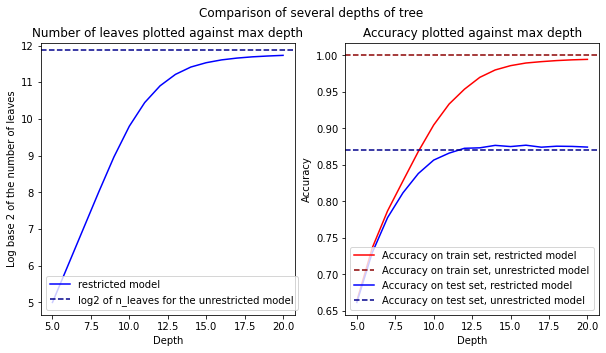

In [44]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier()
tree1.fit(d2_X_train, y_train)
print("Model tree classifier: unrestricted model")
print("Depth: ", tree1.get_depth(), ", Number of leaves: ", tree1.get_n_leaves())
print("Accuracy on the training set: ", tree1.score(d2_X_train, y_train))
print("Accuracy on the test set: ", tree1.score(d2_X_test, y_test))

res_model.append("Decision tree")
res_param.append("Unrestricted max depth \nAll information")
res_train_acc.append(tree1.score(d2_X_train, y_train))
res_valid_acc.append("-")
res_test_acc.append(tree1.score(d2_X_test, y_test))

depths = range(5, 21) #evaluation for each depth of tree
nleaves = len(depths)*[None]
accuracies_train = len(depths)*[None]
accuracies_test = len(depths)*[None]
for depth in depths:
    tree2 = DecisionTreeClassifier(max_depth=depth)
    model = tree2.fit(d2_X_train, y_train)
    nleaves[depth-depths[0]] = tree2.get_n_leaves()
    accuracies_train[depth-depths[0]] = tree2.score(d2_X_train, y_train)
    accuracies_test[depth-depths[0]] = tree2.score(d2_X_test, y_test)
    
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Number of leaves plotted against max depth')
plt.plot(depths, np.log2(nleaves), label='restricted model', color='b')
plt.axhline(np.log2(tree1.get_n_leaves()), 0, depths[-1], color='darkblue', linestyle='--', label='log2 of n_leaves for the unrestricted model')
plt.xlabel("Depth")
plt.ylabel("Log base 2 of the number of leaves")
plt.legend()
plt.subplot(1,2,2)
plt.title('Accuracy plotted against max depth')
plt.plot(depths, accuracies_train, label='Accuracy on train set, restricted model', color='r')
plt.axhline(tree1.score(d2_X_train, y_train), 0, depths[-1], color='darkred', linestyle='--', label='Accuracy on train set, unrestricted model')
plt.plot(depths, accuracies_test, label='Accuracy on test set, restricted model', color='b')
plt.axhline(tree1.score(d2_X_test, y_test), 0, depths[-1], color='darkblue', linestyle='--', label='Accuracy on test set, unrestricted model')
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.suptitle("Comparison of several depths of tree")
plt.show()

res_model.append("Decision tree")
res_param.append("Max depth: 15 \nAll information")
res_train_acc.append(accuracies_train[10])
res_valid_acc.append("-")
res_test_acc.append(accuracies_test[10])

### Q2/2. SVM :

In [ ]:
from sklearn import svm

nbfit = 10 #number of svm to be fitted, must have nbfit%4 = 0
kernels = nbfit//4*['rbf'] + nbfit//4*['linear'] + nbfit//4*['poly'] + nbfit//4*['sigmoid']#the first batch of svm will be gaussian kernel, the second batch will be linear kernel, then polynomial and sigmoid
Cs = nbfit//4*[0.1, 0.5, 1, 2] #we test the same Cs with the two types of kernel
accuracies = nbfit*[None] #table of accuracies
pca = PCA(n_components=pca.n_components_) #PCA to reduce dimensionality
reduced_d2_X_train = pca.fit_transform(d2_X_train)
reduced_d2_X_test = pca.transform(d2_X_test)
nsamples = reduced_d2_X_train.shape[0] #number of samples in the total train set
for k in range(0, nbfit):
    cur_svm = svm.SVC(kernel=kernels[k], C=Cs[k], gamma='auto') #selects the parameters of the current SVM
    indexes_train = list( range(k*nsamples//nbfit, (k+1)*nsamples//nbfit) ) #indexes used to train the current SVM
    indexes_valid = list( range(0, k*nsamples//nbfit) ) + list( range((k+1)*nsamples//nbfit, nsamples) ) #indexes to valid the current SVM, all the train indexes except those used to train the current SVM
    reduced_d2_X_train_svm = reduced_d2_X_train[indexes_train]
    reduced_d2_X_valid_svm = reduced_d2_X_train[indexes_valid]
    y_train_svm = y_train[indexes_train]
    y_valid_svm = y_train[indexes_valid]
    cur_svm.fit(reduced_d2_X_train_svm, y_train_svm) #training of the current svm
    print("SVM fitted: ", k+1, "/", nbfit)
    accuracies[k] = cur_svm.score(reduced_d2_X_valid_svm, y_valid_svm) #accuracy of the current SVM on its validation set 
    
index_bestSVM = np.argmax(accuracies)
print("Best SVM: kernel ", kernels[index_bestSVM], ", C=", Cs[index_bestSVM], ", Accuracy on validation set: ", accuracies[index_bestSVM] )
bestSVM = svm.SVC(kernel=kernels[index_bestSVM], C=Cs[index_bestSVM], gamma='auto')
indexes_train = list( range(index_bestSVM*nsamples//nbfit, (index_bestSVM+1)*nsamples//nbfit) )
reduced_d2_X_train_svm = reduced_d2_X_train[indexes_train]
y_train_svm = y_train[indexes_train]
bestSVM.fit(reduced_d2_X_train_svm, y_train_svm)
print("Accuracy on test set: ", bestSVM.score(reduced_d2_X_test, y_test))

res_model.append("SVM")
res_param_string = "K-cross validation: 20 folds \n154 principle components \nkernel" + str(kernels[index_bestSVM]) + ", C=" + str(Cs[index_bestSVM])
res_param.append(res_param_string)
res_train_acc.append("-")
res_valid_acc.append(accuracies[index_bestSVM])
res_test_acc.append(bestSVM.score(reduced_d2_X_test, y_test))

SVM fitted:  1 / 10
SVM fitted:  2 / 10
SVM fitted:  3 / 10
SVM fitted:  4 / 10


### Q2/3. Naive Bayes :

In [45]:
from sklearn.naive_bayes import GaussianNB

naivebayes = GaussianNB()
naivebayes.fit(d2_X_train, y_train)
print("Naive Bayes Classifier: ")
print("Accuracy on train set: ", naivebayes.score(d2_X_train, y_train))
print("Accuracy on test set: ", naivebayes.score(d2_X_test, y_test))

res_model.append("Gaussian Naive Bayes")
res_param.append("-")
res_train_acc.append(naivebayes.score(d2_X_train, y_train))
res_valid_acc.append("-")
res_test_acc.append(naivebayes.score(d2_X_test, y_test))

Naive Bayes Classifier: 
Accuracy on train set:  0.56475
Accuracy on test set:  0.5612857142857143


### Q2/4 Logistic Regression :

In [46]:
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler

# create StandardScaler instance
#scaler = StandardScaler()

# fit and transform the data
#X_scaled = scaler.fit_transform(d2_X_train)

# use the scaled data for logistic regression


lr2 = LogisticRegression(penalty='l2', dual=False, C=1, solver='lbfgs', multi_class='auto', max_iter=1000)
lr2.fit(d2_X_train, y_train)
lr1 = LogisticRegression(penalty='l1', dual=False, C=1, solver='liblinear', multi_class='auto', max_iter=1000)
lr1.fit(d2_X_train, y_train)

print("Logistic regression (penalty L1):")
print("Accuracy on train set: ", lr1.score(d2_X_train, y_train),"Accuracy on test set: ", lr1.score(d2_X_test, y_test))
print("Logistic regression (penalty L2):")
print("Accuracy on train set: ", lr2.score(d2_X_train, y_train),"Accuracy on test set: ", lr2.score(d2_X_test, y_test))

res_model.append("Logistic regression")
res_param.append("Penalty L1 \nAll information")
res_train_acc.append(lr1.score(d2_X_train, y_train))
res_valid_acc.append("-")
res_test_acc.append(lr1.score(d2_X_test, y_test))
res_model.append("Logistic regression")
res_param.append("Penalty L2 \nAll information")
res_train_acc.append(lr2.score(d2_X_train, y_train))
res_valid_acc.append("-")
res_test_acc.append(lr2.score(d2_X_test, y_test))

C:\Users\ayael\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression (penalty L1):
Accuracy on train set:  0.9335178571428572 Accuracy on test set:  0.9169285714285714
Logistic regression (penalty L2):
Accuracy on train set:  0.9424642857142858 Accuracy on test set:  0.9175714285714286


--------------------------------------------------------------------------------------------------------------------------------

We get a warning suggesting to try to make the solver converge since lbfgs has a better convergence on small datasets, it only stores few vectors that represent the gradients approximation in an implicit manner. 

--------------------------------------------------------------------------------------------------------------------------------

### Q3/ With the score method, compute the accuracy of the model on the training and the test datasets. Why do we need to analyze the performance of the model at training and testing time?

For Decision tree we got:
- Model tree classifier: unrestricted model
- Depth:  50 , Number of leaves:  3742
- Accuracy on the training set:  1.0
- Accuracy on the test set:  0.87

Interpretation :
First of all, "unrestricted model" means that the model don't have any restrictions on its complexity or size. We notice that the deeper the tree (number of nodes/depths) the more accurate the training set is. Having an Accuracy on the training set of 1.0 means that the model is capable of correctly classifying all the data in the training set which can make us worried that we may have an overfitting model. But luckily the Accuracy on the test set is about 0.87 which means that there's no overfitting indeed, the model is able to accurately classify 87% of the data points in the test set.
The decision tree model is for sure more accurate than clustering models that we previously used.

-----------------------------------------------------------------
For SVM, it took so much time to run the model along with PCA and K-Cross in order to find the best kernel to use.

-----------------------------------------------------------------------------------------------------------------------------

 For Naive Bayes we got:
- Naive Bayes Classifier: 
- Accuracy on train set:  0.56
- Accuracy on test set:  0.56

Interpretation :
The model correctly predictes approximately 56% of the data points in the train set and again 56% on the test set.
The Naives Bayes model is not really appropriate to classify our dataset's images.

-----------------------------------------------------------------------

For Logistic Regression we got:
- Logistic regression (penalty L1):
- Accuracy on train set:  0.93
- Accuracy on test set:  0.92
- Logistic regression (penalty L2):
- Accuracy on train set:  0.94
- Accuracy on test set:  0.92

Interpretation :
Whether we use L1 or L2 norm, we get quite the same result. Although, the lbfgs didn't converge, we still have a great accuracy on the test sets because convergence is not a sufficient condition for a good model, however, it is a necessary condition for getting the optimal solution.

----------------------------------------------------------------------

### Q4/ In section 2.1. you applied a PCA to X so that the projected set – hereafter Xred –lies on a “reduced” space. Among the supervised methods you chose, select one method and apply your code to Xred. Does the PCA influence the performance of the classification (according to the intensity of the reduction)?

In [47]:
#!pip install prettytable

In [48]:
from prettytable import PrettyTable

info = [0.66, 0.8, 0.9, 0.95]
depths = len(info)*[None]
nleaves = len(info)*[None]
accuracies_train = len(info)*[None]
accuracies_test = len(info)*[None]

for index in range(0, len(info)):
    elem = info[index]
    pca = PCA(elem)
    reduced_d2_X_train = pca.fit_transform(d2_X_train)
    reduced_d2_X_test = pca.transform(d2_X_test)
    tree = DecisionTreeClassifier()
    model = tree.fit(reduced_d2_X_train, y_train)
    depths[index] = tree.get_depth()
    nleaves[index] = tree.get_n_leaves()
    accuracies_train[index] = tree.score(reduced_d2_X_train, y_train)
    accuracies_test[index] = tree.score(reduced_d2_X_test, y_test)
    
t = PrettyTable()
t.add_column("% information", info)
t.add_column("Tree depth", depths)
t.add_column("number of leaves", nleaves)
t.add_column("Accuracy on train set", accuracies_train)
t.add_column("Accuracy on test set", accuracies_test)
print(t)

res_model.append("Decision tree")
res_param.append("Unrestricted max depth \n66% of information")
res_train_acc.append(accuracies_train[0])
res_valid_acc.append("-")
res_test_acc.append(accuracies_test[0])

+---------------+------------+------------------+-----------------------+----------------------+
| % information | Tree depth | number of leaves | Accuracy on train set | Accuracy on test set |
+---------------+------------+------------------+-----------------------+----------------------+
|      0.66     |     40     |       4865       |          1.0          |  0.8479285714285715  |
|      0.8      |     47     |       4658       |          1.0          |  0.8401428571428572  |
|      0.9      |     51     |       4519       |          1.0          |  0.8349285714285715  |
|      0.95     |     57     |       4458       |          1.0          |  0.8299285714285715  |
+---------------+------------+------------------+-----------------------+----------------------+


- Interpretation: The decision tree model overfits more when it has more tree depth. Indeed, overfitting occurs when the model is too complex.

Yes, the PCA can influence the performance of the classification. PCA preprocesses data in order to reduce its dimensionality which is helpful when it is removing irrelevant redundant features. The performance improves since the problem becomes less complex. However, if too much reduction has been done, the performance quality of the model decreases.

-----------------------------------------------------------------------

# 3.2. Deep Learning

## MultiLayer Perceptron (MLP)

## Questions / Works

### Q1/ What is the size of the input tensor? What is the size of the output layer? 

The input tensor is (samples_number × 784 × 1) 
The size of the output tensor is 10 since we have ten neurons (ten outcomes).

### Q2/ How many epochs do you use? What does it mean? What is the batch_size? What does it means? 

- An epoch is the number of passes a training dataset takes around a machine learning algorithm. In our case, since we have many layers with a lot of neurons per layer, we will then need less epochs to get a great performance of the model (approximately 10 to 30 epochs). 
- Batch size is the number of training examples utilized in one iteration. So in our case, the batch_size = samples_number.

### Q3/ Why do we define a validation set (for example: validation_split=0.2)?

The validation set is used to evaluate the performance of the training after every epoch. 

### Q4/ Pick the most important parameters you have to set with the compile and the fit method. Briefly explain why they are important parameters, i.e. they influence the training process.

The parameters are the loss (sparse categorical crossentropy), the optimizer(Adam optimizer), the metrics we want to evaluate the model on which is the accuracy in our case, epochs and the batch_size.

Indeed, the loss measures the difference between the predicted outputs and the targeted outputs. The choice of the loss function depends on the problem we are trying to solve and its evaluation metrics. The optimizer is used to update the model parameters during training. Metrics monitor the model's performance during training and the choice of metrics to use depends again on the problem we are working on. The number of epochs sets the number of training cycles to be performed over the entire training set. Having a big number of epochs will make the model train for a very long time. And finally, the batch_size sets the number of samples to be processed in one forward or backward pass. Unlike epochs, having a larger batch size makes the training faster but it will need more memory.

C:\Users\ayael\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Model: "MLP0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_24 (Dense)            (None, 32)                25120     
                                                                 
 dense_25 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Activation function: ReLu (Softmax for output), number of epochs: 10


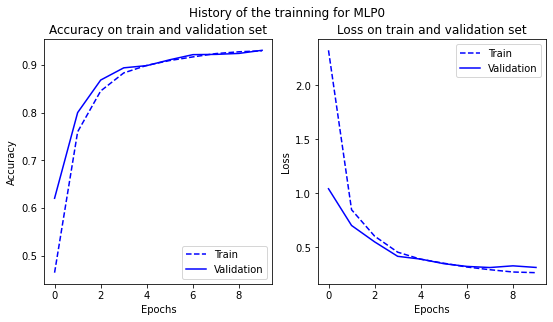

MLP0 : Test loss: 0.34652629494667053 Test accuracy: 0.9241428375244141


In [66]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, Flatten
from tensorflow.keras import Model

epochs = 10

inputs = keras.Input(shape=(d2_X_train.shape[1], ))
x = Dense(32, activation='relu') (inputs)
outputs = Dense(10, activation='softmax') (x)
mlp = Model(inputs, outputs, name="MLP0")

mlp.compile( loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(), metrics=["accuracy"], )
mlp_hist = mlp.fit(d2_X_train, y_train, epochs=epochs, validation_split=0.2, verbose=0)
mlp_score = mlp.evaluate(d2_X_test, y_test, verbose=0)

mlp.summary()
print("Activation function: ReLu (Softmax for output), number of epochs:", epochs)
plt.figure(figsize=(9, 4.5))
plt.subplot(1,2,1)
plt.suptitle("History of the trainning for MLP0")
plt.plot(mlp_hist.epoch, mlp_hist.history['accuracy'], 'b--', label='Train')
plt.plot(mlp_hist.epoch, mlp_hist.history['val_accuracy'], 'b', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy on train and validation set')
plt.legend()
plt.subplot(1,2,2)
plt.plot(mlp_hist.epoch, mlp_hist.history['loss'], 'b--', label='Train')
plt.plot(mlp_hist.epoch, mlp_hist.history['val_loss'], 'b', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss on train and validation set')
plt.legend()
plt.show()
print(mlp.name,": Test loss:", mlp_score[0], "Test accuracy:", mlp_score[1])

res_model.append("MLP")
res_param_string = "1 hidden layer," + str(mlp.count_params()) + " parameters \n" + str(mlp_hist.epoch[-1]+1) + " epochs"
res_param.append(res_param_string)
res_train_acc.append(mlp_hist.history['accuracy'][-1])
res_valid_acc.append(mlp_hist.history['val_accuracy'][-1])
res_test_acc.append(mlp_score[1])

### Q5/ Comment the training results

We get 92% accuracy on the test set which is quite good. We are not underfitting nor overfitting. 
The MLP0 model is not really overfitting since we are using a relatively simple dataset. For other complex data, it could be a sign of overfitting.

-----------------------------------------------------------------------

### Q6/ Is there any overfitting? Why? If yes, what could be the causes? How to fix this issue? If you do not observe overfitting, how can you make your model overfit? Try and demonstrate the overfitting.

C:\Users\ayael\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


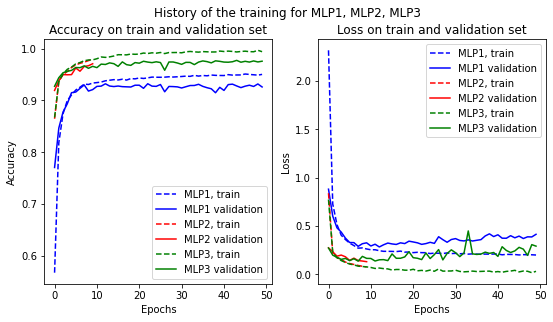

MLP1 : Test loss: 0.43815988302230835 Test accuracy: 0.921999990940094
MLP2 : Test loss: 0.13600732386112213 Test accuracy: 0.9671428799629211
MPL3 : Test loss: 0.33065271377563477 Test accuracy: 0.9734285473823547


In [58]:
epochs = [0, 50, 10, 50] #epoch[0] is not to be used

inputs = keras.Input(shape=(d2_X_train.shape[1], ))
x = Dense(32, activation='relu') (inputs)
outputs = Dense(10, activation='softmax') (x)
mlp1 = Model(inputs, outputs, name="MLP1")

inputs = keras.Input(shape=(d2_X_train.shape[1], ))
x = Dense(128, activation='relu') (inputs)
x = Dense(128, activation='relu') (x)
x = Dense(128, activation='relu') (x)
x = Dense(128, activation='relu') (x)
outputs = Dense(10, activation='softmax') (x)
mlp2 = Model(inputs, outputs, name="MLP2")

inputs = keras.Input(shape=(784,))
x = Dense(128, activation='relu') (inputs)
x = Dense(128, activation='relu') (x)
x = Dense(128, activation='relu') (x)
x = Dense(128, activation='relu') (x)
outputs = Dense(10, activation='softmax') (x)
mlp3 = Model(inputs, outputs, name="MPL3")

mlp1.compile( loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(), metrics=["accuracy"], )
mlp1_hist = mlp1.fit(d2_X_train, y_train, epochs=epochs[1], validation_split=0.2, verbose=0)
mlp1_score = mlp1.evaluate(d2_X_test, y_test, verbose=0)
mlp2.compile( loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(), metrics=["accuracy"], )
mlp2_hist = mlp2.fit(d2_X_train, y_train, epochs=epochs[2], validation_split=0.2, verbose=0)
mlp2_score = mlp2.evaluate(d2_X_test, y_test, verbose=0)
mlp3.compile( loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(), metrics=["accuracy"], )
mlp3_hist = mlp3.fit(d2_X_train, y_train, epochs=epochs[3], validation_split=0.2, verbose=0)
mlp3_score = mlp3.evaluate(d2_X_test, y_test, verbose=0)

plt.figure(figsize=(9, 4.5))
plt.subplot(1,2,1)
plt.suptitle("History of the training for MLP1, MLP2, MLP3")
plt.plot(mlp1_hist.epoch, mlp1_hist.history['accuracy'], 'b--', label='MLP1, train')
plt.plot(mlp1_hist.epoch, mlp1_hist.history['val_accuracy'], 'b', label='MLP1 validation')
plt.plot(mlp2_hist.epoch, mlp2_hist.history['accuracy'], 'r--', label='MLP2, train')
plt.plot(mlp2_hist.epoch, mlp2_hist.history['val_accuracy'], 'r', label='MLP2 validation')
plt.plot(mlp3_hist.epoch, mlp3_hist.history['accuracy'], 'g--', label='MLP3, train')
plt.plot(mlp3_hist.epoch, mlp3_hist.history['val_accuracy'], 'g', label='MLP3 validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy on train and validation set')
plt.legend()
plt.subplot(1,2,2)
plt.plot(mlp1_hist.epoch, mlp1_hist.history['loss'], 'b--', label='MLP1, train')
plt.plot(mlp1_hist.epoch, mlp1_hist.history['val_loss'], 'b', label='MLP1 validation')
plt.plot(mlp2_hist.epoch, mlp2_hist.history['loss'], 'r--', label='MLP2, train')
plt.plot(mlp2_hist.epoch, mlp2_hist.history['val_loss'], 'r', label='MLP2 validation')
plt.plot(mlp3_hist.epoch, mlp3_hist.history['loss'], 'g--', label='MLP3, train')
plt.plot(mlp3_hist.epoch, mlp3_hist.history['val_loss'], 'g', label='MLP3 validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss on train and validation set')
plt.legend()
plt.show()
print(mlp1.name,": Test loss:", mlp1_score[0], "Test accuracy:", mlp1_score[1])
print(mlp2.name,": Test loss:", mlp2_score[0], "Test accuracy:", mlp2_score[1])
print(mlp3.name,": Test loss:", mlp3_score[0], "Test accuracy:", mlp3_score[1])

res_model.append("MLP")
res_param_string = "1 hidden layer," + str(mlp1.count_params()) + " parameters \n" + str(mlp1_hist.epoch[-1]+1) + " epochs"
res_param.append(res_param_string)
res_train_acc.append(mlp1_hist.history['accuracy'][-1])
res_valid_acc.append(mlp1_hist.history['val_accuracy'][-1])
res_test_acc.append(mlp1_score[1])
res_model.append("MLP")
res_param_string = "4 hidden layers," + str(mlp2.count_params()) + " parameters \n" + str(mlp2_hist.epoch[-1]+1) + " epochs"
res_param.append(res_param_string)
res_train_acc.append(mlp2_hist.history['accuracy'][-1])
res_valid_acc.append(mlp2_hist.history['val_accuracy'][-1])
res_test_acc.append(mlp2_score[1])
res_model.append("MLP")
res_param_string = "4 hidden layers," + str(mlp3.count_params()) + " parameters \n" + str(mlp3_hist.epoch[-1]+1) + " epochs"
res_param.append(res_param_string)
res_train_acc.append(mlp3_hist.history['accuracy'][-1])
res_valid_acc.append(mlp3_hist.history['val_accuracy'][-1])
res_test_acc.append(mlp3_score[1])

For MLP3 the training loss << validation loss and the validation loss keeps increasing which is likely a sign of overfitting. MLP1 is overfitting a little less than MLP3. And for MLP2 we can't really be sure but it's likely overfitting a little.

-----------------------------------------------------------------------

### Q7/ According to this first performance, change the architecture of the MLP (change parameters, add/remove layers…) as well as hyper-parameters, explain why, what are the influence on the results…?

Model: "MLP4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


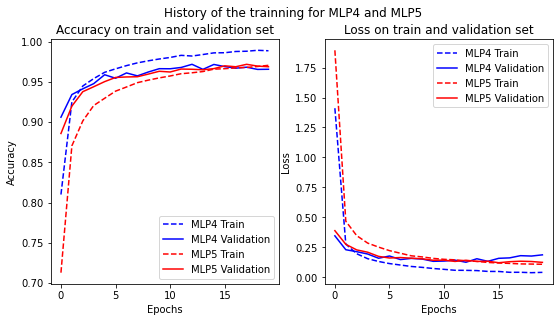

MLP4 : Test loss: 0.20590750873088837 Test accuracy: 0.9652857184410095
MLP5 : Test loss: 0.14148643612861633 Test accuracy: 0.9690714478492737


In [59]:
epochs = 20

inputs = keras.Input(shape=(d2_X_train.shape[1], ))
x = Dense(128, activation='relu') (inputs)
x = Dense(64, activation='relu') (x)
x = Dense(32, activation='relu') (x)
outputs = Dense(10, activation='softmax') (x)
mlp4 = Model(inputs, outputs, name="MLP4")

inputs = keras.Input(shape=(d2_X_train.shape[1], ))
x = Dense(128, activation='relu') (inputs)
x = Dropout(0.15) (x)
x = Dense(64, activation='relu') (x)
x = Dropout(0.15) (x)
x = Dense(32, activation='relu') (x)
outputs = Dense(10, activation='softmax') (x)
mlp5 = Model(inputs, outputs, name="MLP5")

mlp4.compile( loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(), metrics=["accuracy"], )
mlp4_hist = mlp4.fit(d2_X_train, y_train, epochs=epochs, validation_split=0.2, verbose=0)
mlp4_score = mlp4.evaluate(d2_X_test, y_test, verbose=0)
mlp5.compile( loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(), metrics=["accuracy"], )
mlp5_hist = mlp5.fit(d2_X_train, y_train, epochs=epochs, validation_split=0.2, verbose=0)
mlp5_score = mlp5.evaluate(d2_X_test, y_test, verbose=0)

mlp4.summary()

plt.figure(figsize=(9, 4.5))
plt.subplot(1,2,1)
plt.suptitle("History of the trainning for MLP4 and MLP5")
plt.plot(mlp4_hist.epoch, mlp4_hist.history['accuracy'], 'b--', label='MLP4 Train')
plt.plot(mlp4_hist.epoch, mlp4_hist.history['val_accuracy'], 'b', label='MLP4 Validation')
plt.plot(mlp5_hist.epoch, mlp5_hist.history['accuracy'], 'r--', label='MLP5 Train')
plt.plot(mlp5_hist.epoch, mlp5_hist.history['val_accuracy'], 'r', label='MLP5 Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy on train and validation set')
plt.legend()
plt.subplot(1,2,2)
plt.plot(mlp4_hist.epoch, mlp4_hist.history['loss'], 'b--', label='MLP4 Train')
plt.plot(mlp4_hist.epoch, mlp4_hist.history['val_loss'], 'b', label='MLP4 Validation')
plt.plot(mlp5_hist.epoch, mlp5_hist.history['loss'], 'r--', label='MLP5 Train')
plt.plot(mlp5_hist.epoch, mlp5_hist.history['val_loss'], 'r', label='MLP5 Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss on train and validation set')
plt.legend()
plt.show()
print(mlp4.name,": Test loss:", mlp4_score[0], "Test accuracy:", mlp4_score[1])
print(mlp5.name,": Test loss:", mlp5_score[0], "Test accuracy:", mlp5_score[1])

res_model.append("MLP")
res_param_string = "3 hidden layers," + str(mlp4.count_params()) + " parameters \n" + str(mlp4_hist.epoch[-1]+1) + " epochs"
res_param.append(res_param_string)
res_train_acc.append(mlp4_hist.history['accuracy'][-1])
res_valid_acc.append(mlp4_hist.history['val_accuracy'][-1])
res_test_acc.append(mlp4_score[1])
res_model.append("MLP")
res_param_string = "3 hidden layers," + str(mlp5.count_params()) + " parameters \n" + str(mlp5_hist.epoch[-1]+1) + " epochs, Dropout 15%"
res_param.append(res_param_string)
res_train_acc.append(mlp5_hist.history['accuracy'][-1])
res_valid_acc.append(mlp5_hist.history['val_accuracy'][-1])
res_test_acc.append(mlp5_score[1])

MLP4 is clearly overfitting since its training loss << validation loss and its validation loss keeps increasing while the train loss keeps decreasing.
MLP5 is performing well since its training loss and its validation loss are approximately the same.
The dropout method helped to reduce overfitting indeed.

-----------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

## Convolutional Neural Network (CNN)

### Q1/ What is the size of the input tensor? Why it is not the same as for your previous MLP model?


The images are grayscale so the size of the input tensor is (samples_number × 28 × 28 × 1).
We know that CNN is more relevant than MLP when we deal with an image classification problem.

### Q5/ Comment the training results. Is it better than your MLP? Faster? Lighter?

Model: "CNN0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 flatten (Flatten)           (None, 43264)             0         
                                                                 
 dense_20 (Dense)            (None, 64)                2768960   
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                                 
Total params: 2,770,250
Trainable params: 2,770,250
Non-trainable params: 0
_________________________________________________________________


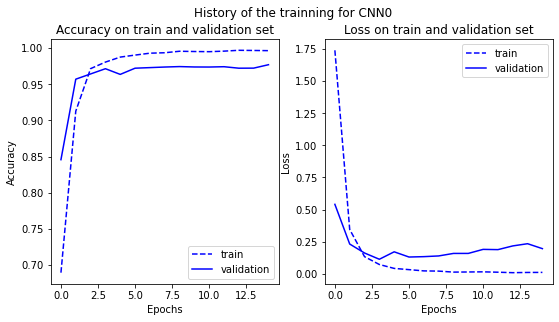

CNN: Test loss: 0.24335673451423645 Test accuracy: 0.9739285707473755


In [61]:
epochs = 15

inputs = keras.Input(shape=(28, 28, 1))
x = Conv2D(filters=64, kernel_size=3, strides=1, padding="valid", activation='relu', input_shape=(32,28,28,1)) (inputs)
x = Flatten() (x)
x = Dense(64, activation='relu') (x)
outputs = Dense(10, activation='softmax') (x)
cnn = Model(inputs, outputs, name="CNN0")

cnn.summary()

cnn.compile( loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(), metrics=["accuracy"], )
cnn_hist = cnn.fit(X_train, y_train, epochs=epochs, validation_split=0.2, verbose=0)
cnn_score = cnn.evaluate(X_test, y_test, verbose=0)

plt.figure(figsize=(9, 4.5))
plt.subplot(1,2,1)
plt.suptitle("History of the trainning for CNN0")
plt.plot(cnn_hist.epoch, cnn_hist.history['accuracy'], 'b--', label='train')
plt.plot(cnn_hist.epoch, cnn_hist.history['val_accuracy'], 'b', label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy on train and validation set')
plt.legend()
plt.subplot(1,2,2)
plt.plot(cnn_hist.epoch, cnn_hist.history['loss'], 'b--', label='train')
plt.plot(cnn_hist.epoch, cnn_hist.history['val_loss'], 'b', label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss on train and validation set')
plt.legend()
plt.show()
print("CNN: Test loss:", cnn_score[0], "Test accuracy:", cnn_score[1])

res_model.append("CNN")
res_param_string = "1 convolutionnal layer," + str(cnn.count_params()) + " parameters \n" + str(cnn_hist.epoch[-1]+1) + " epochs"
res_param.append(res_param_string)
res_train_acc.append(cnn_hist.history['accuracy'][-1])
res_valid_acc.append(cnn_hist.history['val_accuracy'][-1])
res_test_acc.append(cnn_score[1])

Using CNN on our dataset is more computationally expensive than using MLP thus it takes longer to run and it's not lighter than MLP in terms of memory and computational requirements.

--------------------------------------------------------------------------------------------------------------------------------

### Q6/ Is there any overfitting? Why? If yes, what could be the causes? How to fix this issue?If you do not observe overfitting, how can you make your model overfit? Try and demonstrate the overfitting.

Yes the model is clearly overfitting! The train loss of the model is below the validation loss and this validation loss keeps on increasing whilst the train loss keeps on decreasing. 

### Q7/ According to this first performance, change the architecture of the CNN(add/remove kernels, add/remove layers…) as well as hyper-parameters, explain why, what are the influence on the results…?

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 32)          18464  

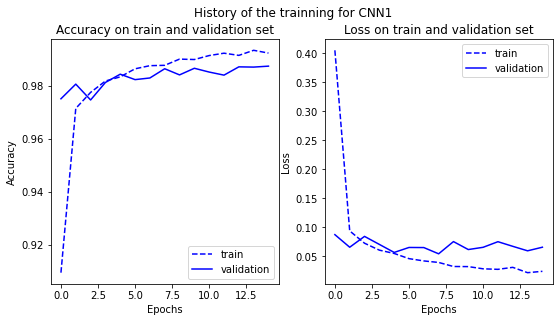

CNN: Test loss: 0.0737231969833374 Test accuracy: 0.9861428737640381


In [63]:
epochs = 15

inputs = keras.Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding="valid", activation='relu', input_shape=(32,28,28,1)) (inputs)
x = MaxPooling2D(2) (x)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding="valid", activation='relu', input_shape=(32,28,28,1)) (x)
x = MaxPooling2D(2) (x)
x = Conv2D(filters=32, kernel_size=3, strides=1, padding="valid", activation='relu', input_shape=(32,28,28,1)) (x)
x = Flatten() (x) #11*11*64
x = Dense(64, activation='relu') (x)
x = Dropout(0.1) (x)
outputs = Dense(10, activation='softmax') (x)
cnn = Model(inputs, outputs, name="CNN1")

cnn.summary()

cnn.compile( loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(), metrics=["accuracy"], )
cnn_hist = cnn.fit(X_train, y_train, epochs=epochs, validation_split=0.2, verbose=0)
cnn_score = cnn.evaluate(X_test, y_test, verbose=0)

plt.figure(figsize=(9, 4.5))
plt.subplot(1,2,1)
plt.suptitle("History of the trainning for CNN1")
plt.plot(cnn_hist.epoch, cnn_hist.history['accuracy'], 'b--', label='train')
plt.plot(cnn_hist.epoch, cnn_hist.history['val_accuracy'], 'b', label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy on train and validation set')
plt.legend()
plt.subplot(1,2,2)
plt.plot(cnn_hist.epoch, cnn_hist.history['loss'], 'b--', label='train')
plt.plot(cnn_hist.epoch, cnn_hist.history['val_loss'], 'b', label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss on train and validation set')
plt.legend()
plt.show()
print("CNN: Test loss:", cnn_score[0], "Test accuracy:", cnn_score[1])

res_model.append("CNN")
res_param_string = "3 convolutionnal layers," + str(cnn.count_params()) + " parameters \n" + str(cnn_hist.epoch[-1]+1) + " epochs"
res_param.append(res_param_string)
res_train_acc.append(cnn_hist.history['accuracy'][-1])
res_valid_acc.append(cnn_hist.history['val_accuracy'][-1])
res_test_acc.append(cnn_score[1])

The model is still overfitting, we should consider decreasing the number of epochs and we need to accentuate more on the dropout method and weight decay.

-----------------------------------------------------------------------

# Conclusion

We went through numerous models to classify handwritten digits images of the MNIST dataset. Each one of them had its cons and pros, some of them were overfitting but it only takes to change parameters and not neglect the power of regularization technics.
We are so grateful to make it to the end of this project report, it was a great introductory adventure in the dazzling world of Machine Learning!

-----------------------------------------------------------------------

                                                               THE END